In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
annualTicketSales = pd.read_csv('dataset/AnnualTicketSales.csv')
annualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [8]:
#annualTicketSales = annualTicketSales.drop("Unnamed:5",axis=1)
annualTicketSales.isnull().sum()

YEAR                                   0
TICKETS SOLD                           0
TOTAL BOX OFFICE                       0
TOTAL INFLATION ADJUSTED BOX OFFICE    0
AVERAGE TICKET PRICE                   0
dtype: int64

In [9]:
annualTicketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   YEAR                                 27 non-null     int64 
 1   TICKETS SOLD                         27 non-null     object
 2   TOTAL BOX OFFICE                     27 non-null     object
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object
 4   AVERAGE TICKET PRICE                 27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [10]:
annualTicketSales["TICKETS SOLD"] = annualTicketSales["TICKETS SOLD"].replace(',','',regex=True)
annualTicketSales["TICKETS SOLD"] = pd.to_numeric(annualTicketSales["TICKETS SOLD"])
type(annualTicketSales["TICKETS SOLD"][0])

numpy.int64

In [224]:
#annualTicketSales["TOTAL BOX OFFICE"] = annualTicketSales["TOTAL BOX OFFICE"].str.replace('$','',regex=True)
#annualTicketSales["TOTAL BOX OFFICE"] = annualTicketSales["TOTAL BOX OFFICE"].replace(',','',regex=True)
#annualTicketSales["TOTAL BOX OFFICE"] = pd.to_numeric(annualTicketSales["TOTAL BOX OFFICE"])

#annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"] = annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"].str.replace('$','',regex=True)
#annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"] = annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"].replace(',','',regex=True)
#annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"] = pd.to_numeric(annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"])

#annualTicketSales["AVERAGE TICKET PRICE"] = annualTicketSales["AVERAGE TICKET PRICE"].str.replace('$','',regex=True)
#annualTicketSales["AVERAGE TICKET PRICE"] = pd.to_numeric(annualTicketSales["AVERAGE TICKET PRICE"])

annualTicketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     int64  
 2   TOTAL BOX OFFICE                     27 non-null     int64  
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     int64  
 4   AVERAGE TICKET PRICE                 27 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [15]:
annualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


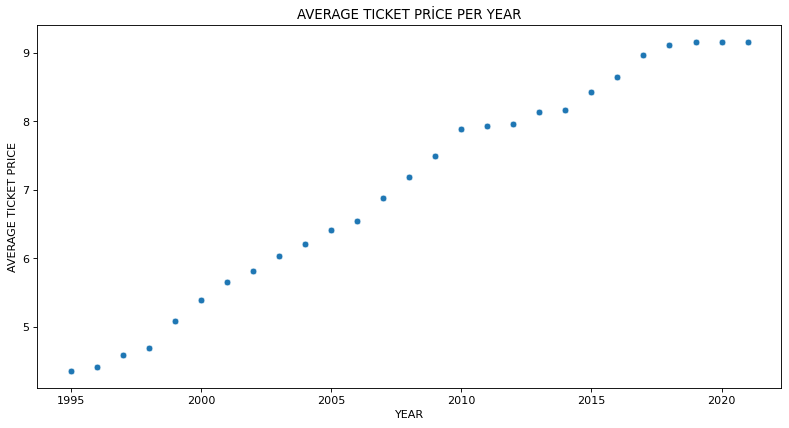

In [17]:
import seaborn as sns
plt.figure(figsize=(12,6),dpi=80)
sns.scatterplot(x = annualTicketSales["YEAR"], y = annualTicketSales["AVERAGE TICKET PRICE"])
plt.title("AVERAGE TICKET PRİCE PER YEAR")
plt.show()

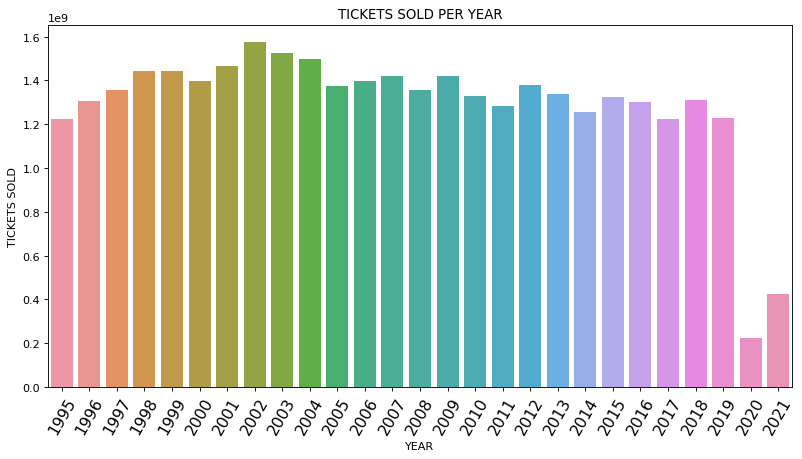

In [22]:
import seaborn as sns
plt.figure(figsize=(12,6),dpi=80)
sns.barplot(x = annualTicketSales["YEAR"], y = annualTicketSales["TICKETS SOLD"])
plt.title("TICKETS SOLD PER YEAR")
plt.xticks(rotation=60,fontsize=14)
plt.show()

From the barplot we can see that total tickets sold fro 1995 till 2020 did not change much. Only last 2 years we can observe the lowest values.

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
plt.figure(figsize=(15,6),dpi=100)
fig = go.Figure()
fig.add_trace(go.Scatter(x = annualTicketSales.YEAR,
                        y = annualTicketSales["TOTAL BOX OFFICE"],
                        mode = "markers+lines",
                        name = "TOTAL BOX OFFİCE",
                        marker = dict(color="rgb(250, 128, 114)")))
fig.add_trace(go.Scatter(x = annualTicketSales.YEAR,
                        y = annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"],
                        mode = "markers+lines",
                        name = "TOTAL INFLATION ADJUSTED BOX OFFICE",
                        marker = dict(color="rgb(100, 149, 237)")))
fig.update_layout(title = "TOTAL BOX OFFICE AND INFLATION EACH YEAR",
                 yaxis = dict(showgrid = True, showline = True, linecolor='#999999',title = "USD"),
                 xaxis = dict(showgrid = True, showline = True, linecolor = "#999999",title="YEAR"),
                 paper_bgcolor='rgb(192, 192, 192)',
                 plot_bgcolor='rgb(214,216,215)',
                 hovermode='x unified')
fig.add_annotation(x = annualTicketSales.iloc[annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"].argmax()].YEAR,
                  y=annualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE']
                   [annualTicketSales.YEAR == annualTicketSales.iloc[annualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].argmax()].YEAR].values[0],
                  text = "Highest TOTAL BOX INFLATON BOX OFFICE")
fig.add_annotation(x = annualTicketSales.iloc[annualTicketSales["TOTAL BOX OFFICE"].argmax()].YEAR,
                  y = annualTicketSales["TOTAL BOX OFFICE"][annualTicketSales.YEAR == annualTicketSales.iloc[annualTicketSales["TOTAL BOX OFFICE"].argmax()].YEAR].values[0],
                  text = "Highest TOTAL BOX OFFICE")
fig.show()

<Figure size 1500x600 with 0 Axes>

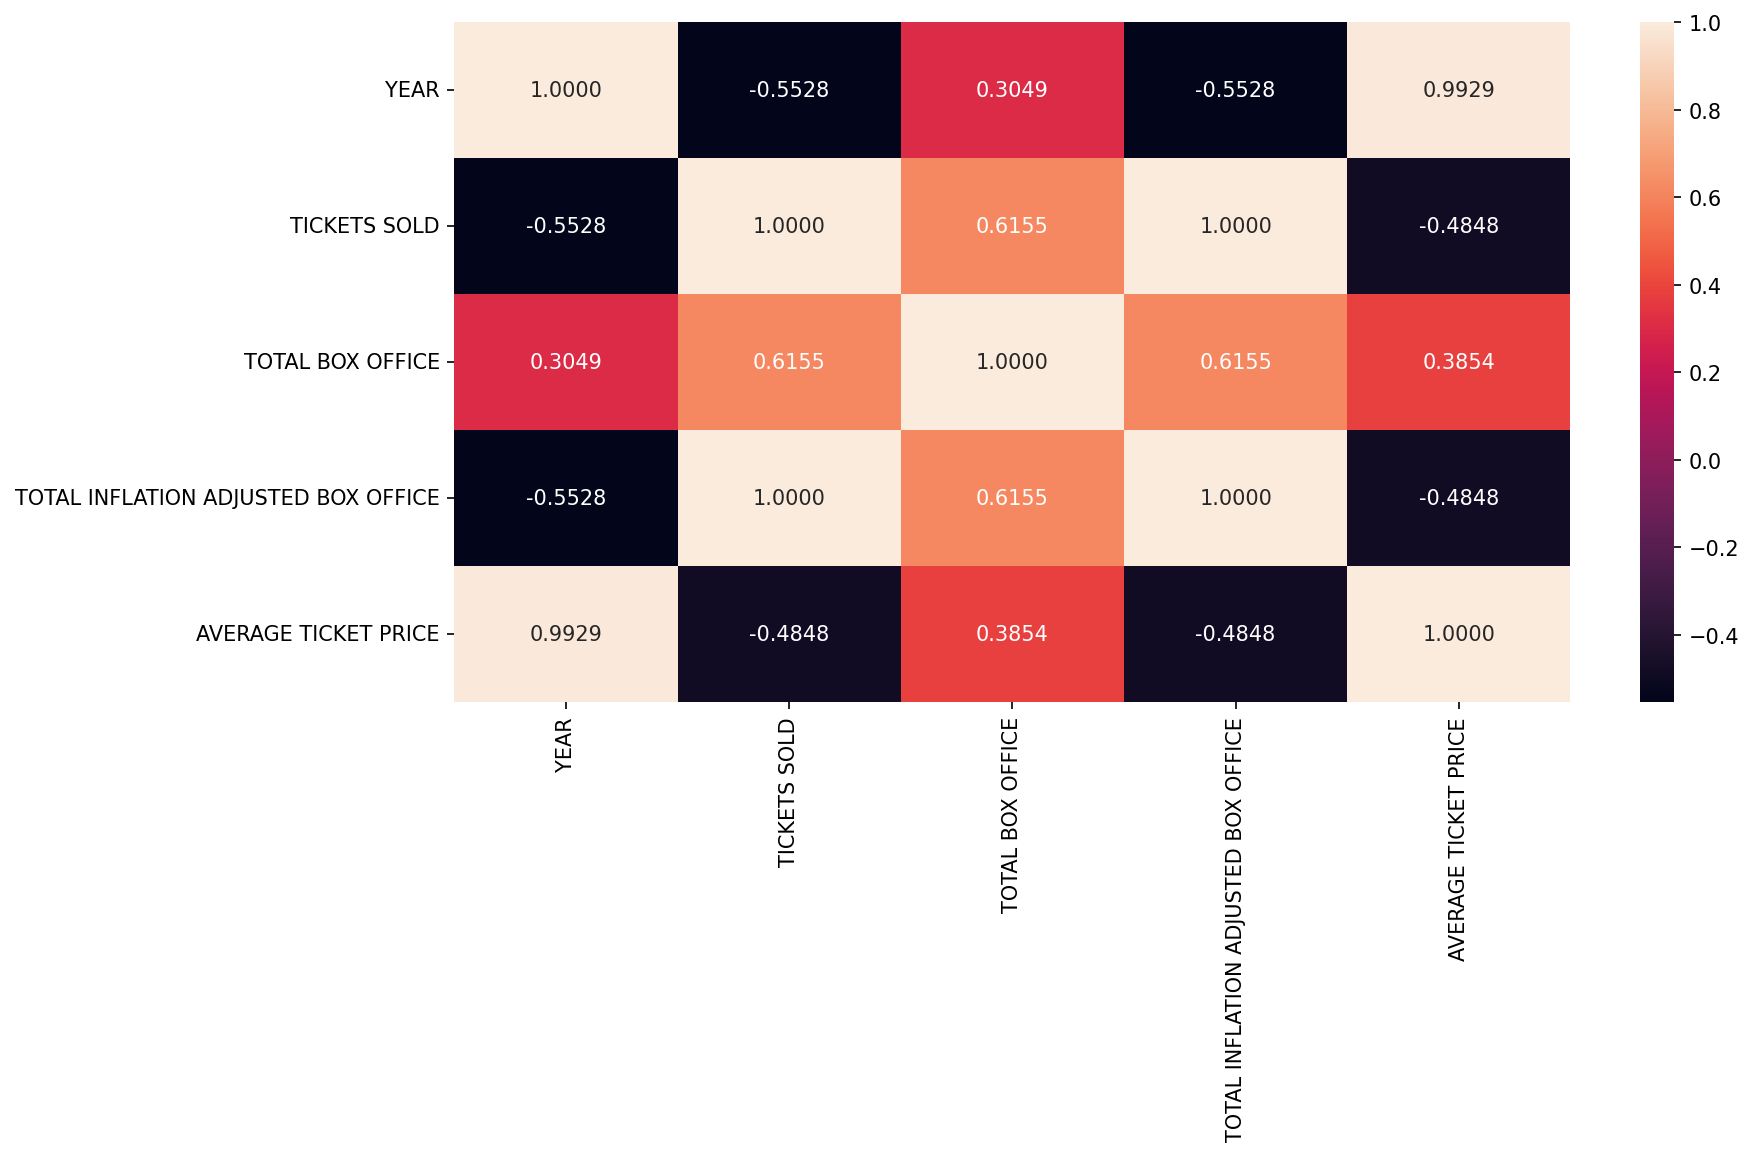

In [59]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(annualTicketSales.corr(),annot=True,fmt=".4f")
plt.show()

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



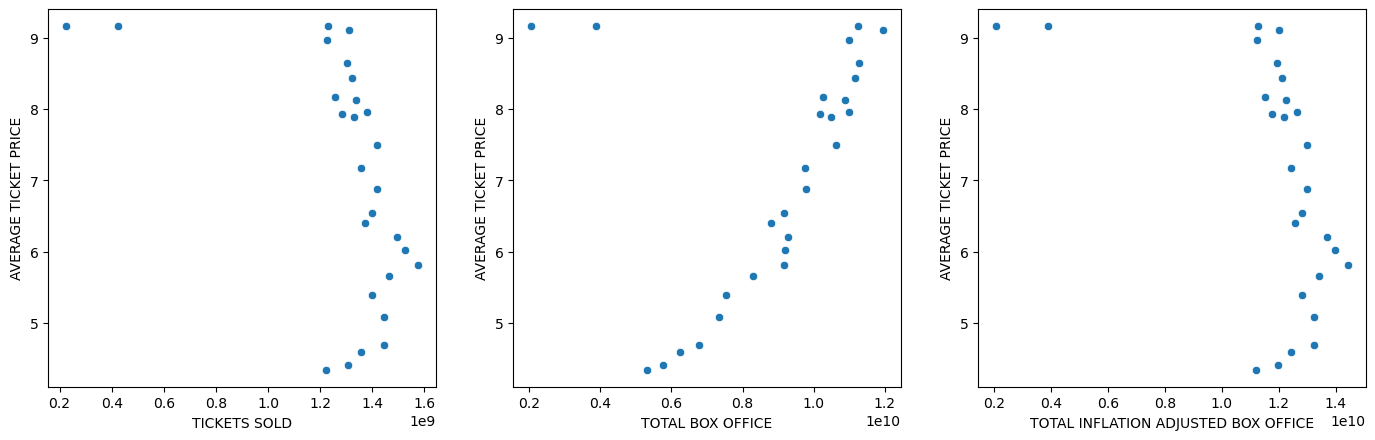

In [71]:
plt_1 = plt.figure(figsize=(17,5),dpi=100)
plt.subplot(1,3,1)
sns.scatterplot(annualTicketSales["TICKETS SOLD"],annualTicketSales["AVERAGE TICKET PRICE"])

plt.subplot(1,3,2)
sns.scatterplot(annualTicketSales["TOTAL BOX OFFICE"],annualTicketSales["AVERAGE TICKET PRICE"])

plt.subplot(1,3,3)
sns.scatterplot(annualTicketSales["TOTAL INFLATION ADJUSTED BOX OFFICE"],annualTicketSales["AVERAGE TICKET PRICE"])
plt.show()

If we remove the outliers we can see there is positive correlation on Total Box Office and somehow negative correlation with Tickets Sold and Inflation, but it is not strong. That is all from Annula Ticket Sales data

In [87]:
Q1 = annualTicketSales["TICKETS SOLD"].quantile(0.25)
Q3 = annualTicketSales["TICKETS SOLD"].quantile(0.75)
iqr = Q3 - Q1
iqr

126566261.0

In [88]:
lowerLimit = Q1 - 1.5*iqr
upperLimit = Q3 + 1.5*iqr
print("Lower Limit: {}\nUpper Limit: {}".format(lowerLimit,upperLimit))

Lower Limit: 1102886381.5
Upper Limit: 1609151425.5


In [89]:
annualTicketSales["TICKETS SOLD"].sort_values(ascending=False)

19    1575756527
18    1524589620
17    1495651298
20    1465874205
22    1444664086
23    1443832471
14    1420036680
12    1418567388
15    1398738283
21    1397460079
9     1380921942
16    1372980280
13    1358042073
24    1357349648
8     1339168926
11    1328549021
6     1323356776
3     1311536128
25    1305221290
5     1302556378
10    1282915168
7     1257402920
2     1228541629
4     1225639761
26    1221705907
0      423774881
1      223638958
Name: TICKETS SOLD, dtype: int64

In [90]:
annualTicketSales[(annualTicketSales["TICKETS SOLD"] < lowerLimit) | (annualTicketSales["TICKETS SOLD"] > upperLimit)]

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16


In [97]:
annualTicketSalesFilter = annualTicketSales[(annualTicketSales["TICKETS SOLD"] > lowerLimit) & (annualTicketSales["TICKETS SOLD"] < upperLimit)]
annualTicketSalesFilter.sort_values("TICKETS SOLD",ascending=False)

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
19,2002,1575756527,9155147215,14433929789,5.81
18,2003,1524589620,9193277289,13965240914,6.03
17,2004,1495651298,9287996519,13700165883,6.21
20,2001,1465874205,8296849636,13427407722,5.66
22,1999,1444664086,7338894852,13233123027,5.08
23,1998,1443832471,6771575283,13225505439,4.69
14,2007,1420036680,9769854914,13007535993,6.88
12,2009,1418567388,10639257284,12994051137,7.50
15,2006,1398738283,9161738221,12812442671,6.55
21,2000,1397460079,7532311479,12800734319,5.39


C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



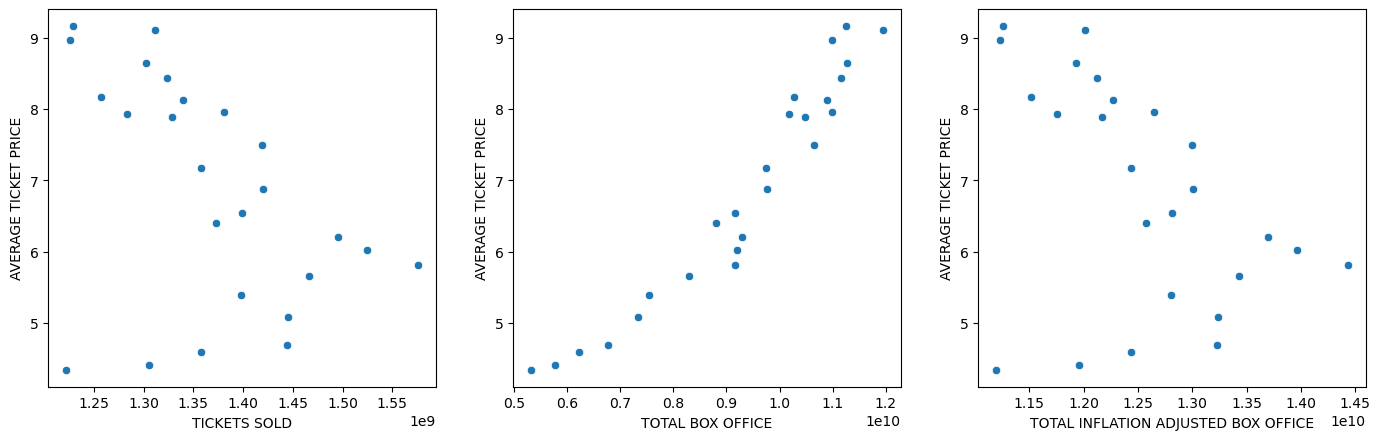

In [99]:
plt_1 = plt.figure(figsize=(17,5),dpi=100)
plt.subplot(1,3,1)
sns.scatterplot(annualTicketSalesFilter["TICKETS SOLD"],annualTicketSalesFilter["AVERAGE TICKET PRICE"])

plt.subplot(1,3,2)
sns.scatterplot(annualTicketSalesFilter["TOTAL BOX OFFICE"],annualTicketSalesFilter["AVERAGE TICKET PRICE"])

plt.subplot(1,3,3)
sns.scatterplot(annualTicketSalesFilter["TOTAL INFLATION ADJUSTED BOX OFFICE"],annualTicketSalesFilter["AVERAGE TICKET PRICE"])
plt.show()

So, we obtained a more accurate data by dropping outliers from the data

In [100]:
highestGrossers = pd.read_csv("dataset/HighestGrossers.csv")
highestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [101]:
highestGrossers.isnull().sum()

YEAR                     0
MOVIE                    0
GENRE                    3
MPAA RATING              0
DISTRIBUTOR              0
TOTAL FOR YEAR           0
TOTAL IN 2019 DOLLARS    0
TICKETS SOLD             0
dtype: int64

In [102]:
highestGrossers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  24 non-null     object
 3   MPAA RATING            27 non-null     object
 4   DISTRIBUTOR            27 non-null     object
 5   TOTAL FOR YEAR         27 non-null     object
 6   TOTAL IN 2019 DOLLARS  27 non-null     object
 7   TICKETS SOLD           27 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.8+ KB


In [103]:
highestGrossers["TOTAL FOR YEAR"] = highestGrossers["TOTAL FOR YEAR"].str.replace('$','',regex=True)
highestGrossers["TOTAL FOR YEAR"] = highestGrossers["TOTAL FOR YEAR"].replace(',','',regex=True)
highestGrossers["TOTAL FOR YEAR"] = pd.to_numeric(highestGrossers["TOTAL FOR YEAR"])

highestGrossers["TOTAL IN 2019 DOLLARS"] = highestGrossers["TOTAL IN 2019 DOLLARS"].str.replace('$','',regex=True)
highestGrossers["TOTAL IN 2019 DOLLARS"] = highestGrossers["TOTAL IN 2019 DOLLARS"].replace(',','',regex=True)
highestGrossers["TOTAL IN 2019 DOLLARS"] = pd.to_numeric(highestGrossers["TOTAL IN 2019 DOLLARS"])

highestGrossers["TICKETS SOLD"] = highestGrossers["TICKETS SOLD"].replace(',','',regex=True)
highestGrossers["TICKETS SOLD"] = pd.to_numeric(highestGrossers["TICKETS SOLD"])

highestGrossers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  24 non-null     object
 3   MPAA RATING            27 non-null     object
 4   DISTRIBUTOR            27 non-null     object
 5   TOTAL FOR YEAR         27 non-null     int64 
 6   TOTAL IN 2019 DOLLARS  27 non-null     int64 
 7   TICKETS SOLD           27 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.8+ KB


In [104]:
highestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942


In [117]:
df = highestGrossers
fig = px.pie(df, values='TICKETS SOLD', names='DISTRIBUTOR', color_discrete_sequence=px.colors.sequential.RdBu,
            title = "TICKETS SOLD BY DISTRIBUTOR",hole=.3)
fig.show()

From 1995 to 2020 we can observe that most tickets sold was for the movies distributed by Walt Disney. And the least one is Universal.

In [146]:
data = highestGrossers['MPAA RATING'].value_counts()[:10]
label = data.index
size = data.values

trace = go.Pie(labels=label, values=size, hole=.2)
data = [trace]
layout = go.Layout(
        title = "MPAA RATING")
fig = go.Figure(data=data,layout = layout)
py.iplot(fig)

From the Pie chart we can see that the most tickets sold belong to PG-13 category movies

In [265]:
trace = go.Bar(
    x=highestGrossers.YEAR,
    y=highestGrossers["TICKETS SOLD"], 
)
layout = go.Layout(
        title = "TICKETS SALES BY YEAR")
fig = go.Figure(data = [trace], layout = layout) 
py.iplot(fig)

we can see that the most sales were in 1998

In [158]:
fig = px.pie(highestGrossers, values = "TICKETS SOLD", names = "MOVIE",title="TICKETS SOLD BY MOVIE",hole=.2,
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

we can see that the most sales are for titanic film

In [166]:
groupbyGenre = highestGrossers.groupby("GENRE",as_index=False).sum()
groupbyGenre = groupbyGenre.drop("YEAR",axis=1)
groupbyGenre.head()

,GENRE,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,Action,4447496795,5101959828,556982514
1,Adventure,5401937937,8173858097,892342587
2,Drama,184031112,387522978,42306002


In [266]:
fig = px.pie(groupbyGenre,values = "TICKETS SOLD", names = "GENRE",hole=.4, title = "TICKETS SOLD BY GENRE")
fig.show()

In [176]:
top10_movies = highestGrossers.sort_values("TICKETS SOLD",ascending=False).head(10)
top10_movies

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
24,2019,Avengers: Endgame,NaN,PG-13,Walt Disney,858373000,858373002,93708843
20,2015,Star Wars Ep. VII: The Force Awakens,Action,PG-13,Walt Disney,742208942,806480887,88043765
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942
17,2012,The Avengers,Adventure,PG-13,Walt Disney,623357910,717331462,78311295
23,2018,Black Panther,Action,PG-13,Walt Disney,700059566,703901821,76845177
13,2008,The Dark Knight,Adventure,PG-13,Warner Bros.,531001578,677433772,73955652
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062


In [267]:
fig = px.bar(top10_movies, x='TICKETS SOLD', y='MOVIE', title  = "TICKETS SOLD BY MOVIE")
fig.show()

In [178]:
least10_movies = highestGrossers.sort_values("TICKETS SOLD",ascending=True).head(10)
least10_movies

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
25,2020,Bad Boys For Life,NaN,R,Sony Pictures,204417855,204417848,22316359
26,2021,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,224226704,224226704,24478897
19,2014,Guardians of the Galaxy,Adventure,PG-13,Walt Disney,333055258,373413235,40765637
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,47006948
16,2011,Harry Potter and the Deathly Hallows: Part II,Action,PG-13,Warner Bros.,381011219,440108798,48046812
12,2007,Spider-Man 3,Adventure,PG-13,Sony Pictures,336530303,448054878,48914288
18,2013,Iron Man 3,Adventure,PG-13,Walt Disney,408992272,460808016,50306552
15,2010,Toy Story 3,Action,G,Walt Disney,415004880,481805411,52598844
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,53074988


In [268]:
fig = px.bar(least10_movies, x = "TICKETS SOLD", y = "MOVIE", title = "Least 10 MOVIES'S TICKETS SOLD")
fig.show()

In [180]:
popularCreativeTypes = pd.read_csv("dataset/PopularCreativeTypes.csv")
popularCreativeTypes.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%


In [181]:
popularCreativeTypes.isnull().sum()

RANK              1
CREATIVE TYPES    1
MOVIES            1
TOTAL GROSS       1
AVERAGE GROSS     1
MARKET SHARE      1
dtype: int64

In [182]:
popularCreativeTypes

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%
5,6.0,Historical Fiction,"1,487","$18,521,260,744","$12,455,454",7.79%
6,7.0,Dramatization,"1,175","$15,715,191,699","$13,374,631",6.61%
7,8.0,Factual,"2,467","$2,960,327,207","$1,199,970",1.25%
8,9.0,Multiple Creative Types,42,"$117,574,526","$2,799,393",0.05%
9,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
popularCreativeTypes = popularCreativeTypes.drop([9],axis=0)
popularCreativeTypes

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%
5,6.0,Historical Fiction,"1,487","$18,521,260,744","$12,455,454",7.79%
6,7.0,Dramatization,"1,175","$15,715,191,699","$13,374,631",6.61%
7,8.0,Factual,"2,467","$2,960,327,207","$1,199,970",1.25%
8,9.0,Multiple Creative Types,42,"$117,574,526","$2,799,393",0.05%


In [186]:
popularCreativeTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RANK            9 non-null      float64
 1   CREATIVE TYPES  9 non-null      object 
 2   MOVIES          9 non-null      object 
 3   TOTAL GROSS     9 non-null      object 
 4   AVERAGE GROSS   9 non-null      object 
 5   MARKET SHARE    9 non-null      object 
dtypes: float64(1), object(5)
memory usage: 560.0+ bytes


In [190]:
#popularCreativeTypes["MOVIES"] = popularCreativeTypes["MOVIES"].replace(',','',regex=True)
#popularCreativeTypes["MOVIES"] = pd.to_numeric(popularCreativeTypes["MOVIES"])

#popularCreativeTypes["TOTAL GROSS"] = popularCreativeTypes["TOTAL GROSS"].replace(',','',regex=True)
#popularCreativeTypes["TOTAL GROSS"] = popularCreativeTypes["TOTAL GROSS"].str.replace('$','',regex=True)
#popularCreativeTypes["TOTAL GROSS"] = pd.to_numeric(popularCreativeTypes["TOTAL GROSS"])

popularCreativeTypes["AVERAGE GROSS"] = popularCreativeTypes["AVERAGE GROSS"].replace(',','',regex=True)
popularCreativeTypes["AVERAGE GROSS"] = popularCreativeTypes["AVERAGE GROSS"].str.replace('$','',regex=True)
popularCreativeTypes["AVERAGE GROSS"] = pd.to_numeric(popularCreativeTypes["AVERAGE GROSS"])

popularCreativeTypes["MARKET SHARE"] = popularCreativeTypes["MARKET SHARE"].replace(',','',regex=True)
popularCreativeTypes["MARKET SHARE"] = popularCreativeTypes["MARKET SHARE"].str.replace('%','',regex=True)
popularCreativeTypes["MARKET SHARE"] = pd.to_numeric(popularCreativeTypes["MARKET SHARE"])

In [191]:
popularCreativeTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RANK            9 non-null      float64
 1   CREATIVE TYPES  9 non-null      object 
 2   MOVIES          9 non-null      int64  
 3   TOTAL GROSS     9 non-null      int64  
 4   AVERAGE GROSS   9 non-null      int64  
 5   MARKET SHARE    9 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 560.0+ bytes


In [192]:
popularCreativeTypes.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,7442,96203727036,12927133,40.46
1,2.0,Kids Fiction,564,32035539746,56800602,13.47
2,3.0,Science Fiction,724,29922660857,41329642,12.59
3,4.0,Fantasy,759,21724062575,28621953,9.14
4,5.0,Super Hero,129,20273157911,157156263,8.53


In [269]:
fig = px.bar(popularCreativeTypes, x = "MOVIES", y = "CREATIVE TYPES", title = "CREATIVE TYPES BY MOVIES")
fig.show()

From the bar plot we can observe that the most numbr of movies are from Contemporary Fiction section.

In [270]:
fig = px.pie(popularCreativeTypes, values = "AVERAGE GROSS", names = "CREATIVE TYPES", title = "AVERAGE GROSS BY CREATIVE TYPES")
fig.show()

In [197]:
topDistributors = pd.read_csv("dataset/TopDistributors.csv")
topDistributors.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,"$40,472,424,278","$68,830,654",17.02%
1,2,Warner Bros.,824,"$36,269,425,479","$44,016,293",15.25%
2,3,Sony Pictures,747,"$29,113,002,302","$38,973,229",12.24%
3,4,Universal,535,"$28,089,932,569","$52,504,547",11.81%
4,5,20th Century Fox,525,"$25,857,839,756","$49,253,028",10.88%


In [198]:
topDistributors.isnull().sum()

RANK             0
DISTRIBUTORS     0
MOVIES           0
TOTAL GROSS      0
AVERAGE GROSS    0
MARKET SHARE     0
dtype: int64

In [199]:
topDistributors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           10 non-null     int64 
 1   DISTRIBUTORS   10 non-null     object
 2   MOVIES         10 non-null     int64 
 3   TOTAL GROSS    10 non-null     object
 4   AVERAGE GROSS  10 non-null     object
 5   MARKET SHARE   10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes


In [200]:
topDistributors["TOTAL GROSS"] = topDistributors["TOTAL GROSS"].str.replace('$','',regex=True)
topDistributors["TOTAL GROSS"] = topDistributors["TOTAL GROSS"].replace(',','',regex=True)
topDistributors["TOTAL GROSS"] = pd.to_numeric(topDistributors["TOTAL GROSS"])

topDistributors["AVERAGE GROSS"] = topDistributors["AVERAGE GROSS"].str.replace('$','',regex=True)
topDistributors["AVERAGE GROSS"] = topDistributors["AVERAGE GROSS"].replace(',','',regex=True)
topDistributors["AVERAGE GROSS"] = pd.to_numeric(topDistributors["AVERAGE GROSS"])

topDistributors["MARKET SHARE"] = topDistributors["MARKET SHARE"].str.replace('%','',regex=True)
topDistributors["MARKET SHARE"] = topDistributors["MARKET SHARE"].replace(',','',regex=True)
topDistributors["MARKET SHARE"] = pd.to_numeric(topDistributors["MARKET SHARE"])

In [201]:
topDistributors.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,17.02
1,2,Warner Bros.,824,36269425479,44016293,15.25
2,3,Sony Pictures,747,29113002302,38973229,12.24
3,4,Universal,535,28089932569,52504547,11.81
4,5,20th Century Fox,525,25857839756,49253028,10.88


In [202]:
topDistributors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RANK           10 non-null     int64  
 1   DISTRIBUTORS   10 non-null     object 
 2   MOVIES         10 non-null     int64  
 3   TOTAL GROSS    10 non-null     int64  
 4   AVERAGE GROSS  10 non-null     int64  
 5   MARKET SHARE   10 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 608.0+ bytes


In [207]:
top10_dist = topDistributors.sort_values("MOVIES",ascending=False).head(10)  # bu grafik çok anlamlı değilllllll
fig = px.pie(top10_dist, values = "MOVIES", names = "DISTRIBUTORS",hole=.2)
fig.show()

<Figure size 360x720 with 0 Axes>

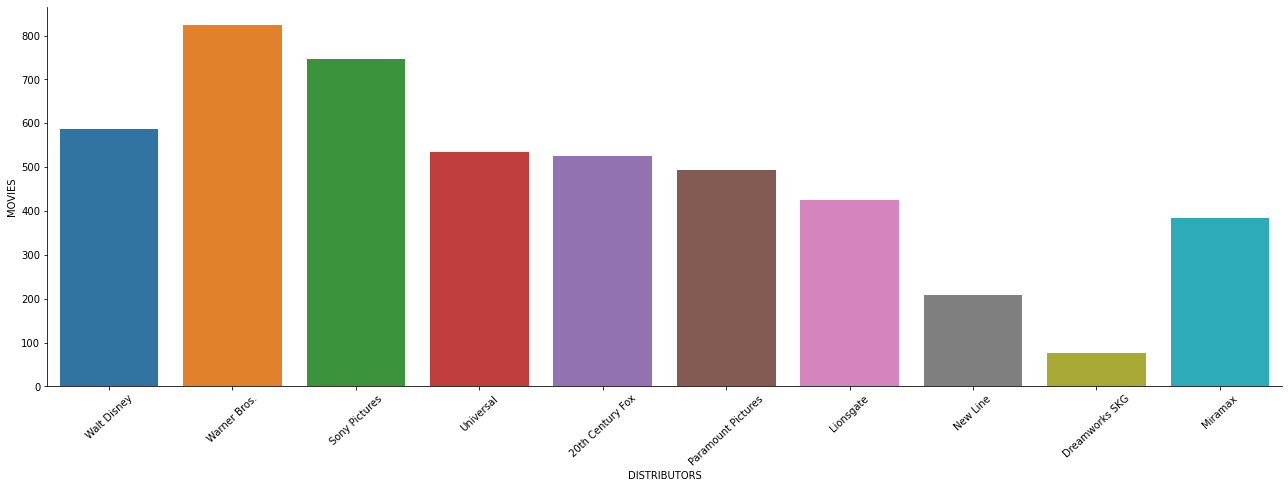

In [222]:
fig=plt.figure(figsize=(5,10))
ax = sns.catplot(y='MOVIES', x='DISTRIBUTORS',kind='bar', data=topDistributors, height=6, aspect=3)
ax = plt.gca()
# Call draw function
plt.draw()
# Tick rotation on axes
for tick in ax.get_xticklabels():
    tick.set_rotation(43)
plt.show()

In [212]:
fig = px.bar(topDistributors, y = "MOVIES", x = "DISTRIBUTORS", color = "DISTRIBUTORS",title="MOVIES BY DISTRIBUTORS")
fig.show()

From this bar plot we can see that the top movie distributors were Warner Bros. and Sony Pictures

In [230]:
fig = px.bar(topDistributors, x = "DISTRIBUTORS", y= "TOTAL GROSS" ,color="DISTRIBUTORS")
fig.show()

In [232]:
topGenres = pd.read_csv("dataset/TopGenres.csv")
topGenres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%
5,6,Horror,716,"$13,430,378,699","$18,757,512",5.65%
6,7,Romantic Comedy,630,"$10,480,124,374","$16,635,118",4.41%
7,8,Musical,201,"$4,293,988,317","$21,363,126",1.81%
8,9,Documentary,"2,415","$2,519,513,142","$1,043,277",1.06%
9,10,Black Comedy,213,"$2,185,433,323","$10,260,250",0.92%


In [233]:
topGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           10 non-null     int64 
 1   GENRES         10 non-null     object
 2   MOVIES         10 non-null     object
 3   TOTAL GROSS    10 non-null     object
 4   AVERAGE GROSS  10 non-null     object
 5   MARKET SHARE   10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [236]:
topGenres["MOVIES"] = topGenres["MOVIES"].replace(',','',regex=True)
topGenres["MOVIES"] = pd.to_numeric(topGenres["MOVIES"])

topGenres["TOTAL GROSS"] = topGenres["TOTAL GROSS"].str.replace('$','',regex=True)
topGenres["TOTAL GROSS"] = topGenres["TOTAL GROSS"].replace(',','',regex=True)
topGenres["TOTAL GROSS"] = pd.to_numeric(topGenres["TOTAL GROSS"])

topGenres["AVERAGE GROSS"] = topGenres["AVERAGE GROSS"].str.replace('$','',regex=True)
topGenres["AVERAGE GROSS"] = topGenres["AVERAGE GROSS"].replace(',','',regex=True)
topGenres["AVERAGE GROSS"] = pd.to_numeric(topGenres["AVERAGE GROSS"])

topGenres["MARKET SHARE"] = topGenres["MARKET SHARE"].str.replace('%','',regex=True)
topGenres["MARKET SHARE"] = topGenres["MARKET SHARE"].replace(',','',regex=True)
topGenres["MARKET SHARE"] = pd.to_numeric(topGenres["MARKET SHARE"])

In [237]:
topGenres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RANK           10 non-null     int64  
 1   GENRES         10 non-null     object 
 2   MOVIES         10 non-null     int64  
 3   TOTAL GROSS    10 non-null     int64  
 4   AVERAGE GROSS  10 non-null     int64  
 5   MARKET SHARE   10 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 608.0+ bytes


In [245]:
topMovies = topGenres.sort_values("MOVIES",ascending=False)
fig = px.bar(topMovies, x = "GENRES", y = "MOVIES", color="GENRES")
fig.show()

from the bar chart, we can see that the most drama films have been watched

In [246]:
fig = px.bar(topGenres, x = "GENRES", y = "TOTAL GROSS", color = "GENRES")
fig.show()

However, we can observe that the most total gross was gained from Adventure Genre

In [248]:
topGrossingRatings = pd.read_csv("dataset/TopGrossingRatings.csv")
topGrossingRatings

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,"3,243","$113,524,789,243","$35,006,102",47.75%
1,2,R,"5,480","$63,497,164,978","$11,587,074",26.71%
2,3,PG,"1,535","$49,124,317,794","$32,002,813",20.66%
3,4,G,395,"$9,572,240,391","$24,233,520",4.03%
4,5,Not Rated,"5,820","$1,918,358,283","$329,615",0.81%
5,6,NC-17,24,"$44,850,139","$1,868,756",0.02%
6,7,Open,5,"$5,489,687","$1,097,937",0.00%
7,8,GP,7,"$552,618","$78,945",0.00%


In [252]:
'''
topGrossingRatings["MOVIES"] = topGrossingRatings["MOVIES"].replace(',','',regex=True)
topGrossingRatings["MOVIES"] = pd.to_numeric(topGrossingRatings["MOVIES"])

topGrossingRatings["TOTAL GROSS"] = topGrossingRatings["TOTAL GROSS"].str.replace('$','',regex=True)
topGrossingRatings["TOTAL GROSS"] = topGrossingRatings["TOTAL GROSS"].replace(',','',regex=True)
topGrossingRatings["TOTAL GROSS"] = pd.to_numeric(topGrossingRatings["TOTAL GROSS"])

topGrossingRatings["AVERAGE GROSS"] = topGrossingRatings["AVERAGE GROSS"].str.replace('$','',regex=True)
topGrossingRatings["AVERAGE GROSS"] = topGrossingRatings["AVERAGE GROSS"].replace(',','',regex=True)
topGrossingRatings["AVERAGE GROSS"] = pd.to_numeric(topGrossingRatings["AVERAGE GROSS"])

'''

topGrossingRatings["MARKET SHARE"] = topGrossingRatings["MARKET SHARE"].str.replace('%','',regex=True)
topGrossingRatings["MARKET SHARE"] = pd.to_numeric(topGrossingRatings["MARKET SHARE"])

In [253]:
topGrossingRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RANK           8 non-null      int64  
 1   MPAA RATINGS   8 non-null      object 
 2   MOVIES         8 non-null      int64  
 3   TOTAL GROSS    8 non-null      int64  
 4   AVERAGE GROSS  8 non-null      int64  
 5   MARKET SHARE   8 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 512.0+ bytes


In [257]:
topMoviesGross = topGrossingRatings.sort_values("MOVIES",ascending=False)
fig = px.bar(topMoviesGross, x = "MOVIES", y = "MPAA RATINGS", color = "MPAA RATINGS")
fig.show()

from this bar chart, we can see that the movies watched are the most Not Rated and  R  according to the MPAA Ratings

In [258]:
topGrossingAverage = topGrossingRatings.sort_values("AVERAGE GROSS",ascending=False)
fig = px.bar(topGrossingAverage, x = "MPAA RATINGS", y = "AVERAGE GROSS", color = "MPAA RATINGS")
fig.show()

on average, we can see that the maximum gross is obtained from PG-13. despite the fact that it is the most watched film classification in the Not Rated classification, its average gross is very small

In [259]:
fig = px.bar(topGrossingRatings, x = "MPAA RATINGS", y = "MARKET SHARE", color = "MPAA RATINGS")
fig.show()

as can be seen from the bar chart, but the average gross is small in R compared to PG and G, but the market share is larger in Relation

In [260]:
topGrossingSources = pd.read_csv("dataset/TopGrossingSources.csv")
topGrossingSources

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,"7,946","$106,375,196,782","$13,387,264",44.74%
1,2,Based on Fiction Book/Short Story,"2,150","$47,005,613,207","$21,863,076",19.77%
2,3,Based on Comic/Graphic Novel,249,"$23,369,989,130","$93,855,378",9.83%
3,4,Remake,328,"$12,832,659,970","$39,123,963",5.40%
4,5,Based on Real Life Events,"3,225","$11,398,356,297","$3,534,374",4.79%
5,6,Based on TV,231,"$11,305,006,312","$48,939,421",4.75%
6,7,Based on Factual Book/Article,295,"$7,443,681,990","$25,232,820",3.13%
7,8,Spin-Off,41,"$3,833,128,331","$93,490,935",1.61%
8,9,Based on Folk Tale/Legend/Fairytale,78,"$3,406,118,495","$43,668,186",1.43%
9,10,Based on Play,271,"$2,111,190,923","$7,790,372",0.89%


In [261]:
topGrossingSources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           10 non-null     int64 
 1   SOURCES        10 non-null     object
 2   MOVIES         10 non-null     object
 3   TOTAL GROSS    10 non-null     object
 4   AVERAGE GROSS  10 non-null     object
 5   MARKET SHARE   10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [262]:
topGrossingSources["MOVIES"] = topGrossingSources["MOVIES"].replace(',','',regex=True)
topGrossingSources["MOVIES"] = pd.to_numeric(topGrossingSources["MOVIES"])

topGrossingSources["TOTAL GROSS"] = topGrossingSources["TOTAL GROSS"].str.replace('$','',regex=True)
topGrossingSources["TOTAL GROSS"] = topGrossingSources["TOTAL GROSS"].replace(',','',regex=True)
topGrossingSources["TOTAL GROSS"] = pd.to_numeric(topGrossingSources["TOTAL GROSS"])

topGrossingSources["AVERAGE GROSS"] = topGrossingSources["AVERAGE GROSS"].str.replace('$','',regex=True)
topGrossingSources["AVERAGE GROSS"] = topGrossingSources["AVERAGE GROSS"].replace(',','',regex=True)
topGrossingSources["AVERAGE GROSS"] = pd.to_numeric(topGrossingSources["AVERAGE GROSS"])

topGrossingSources["MARKET SHARE"] = topGrossingSources["MARKET SHARE"].str.replace('%','',regex=True)
topGrossingSources["MARKET SHARE"] = pd.to_numeric(topGrossingSources["MARKET SHARE"])

In [263]:
topGrossingSources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RANK           10 non-null     int64  
 1   SOURCES        10 non-null     object 
 2   MOVIES         10 non-null     int64  
 3   TOTAL GROSS    10 non-null     int64  
 4   AVERAGE GROSS  10 non-null     int64  
 5   MARKET SHARE   10 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 608.0+ bytes


In [264]:
moviesDesc = topGrossingSources.sort_values("MOVIES",ascending=False)
fig = px.bar(moviesDesc, x = "SOURCES", y = "MOVIES", color = "SOURCES")
fig.show()